## Holmes Model

(2.2) from Hughes et al. 2024

$\frac{\partial u}{\partial t}=(b+\gamma\frac{u^2}{1+u^2})v-(1+s\frac{F}{1+F})u+D\triangle u$

$\frac{\partial v}{\partial t}=-(b+\gamma\frac{u^2}{1+u^2})v+(1+s\frac{F}{1+F})u+\triangle v$

$\frac{\partial F}{\partial t}=\theta(pu-F)$

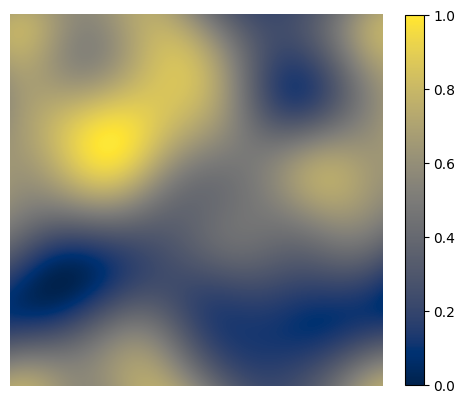

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from pde_utils import periodic_laplacian as laplacian

# define parameters
b = 4.5 # GTPase basal rate of activation
I = 1 # GTPase inactivation rate
gamma = 3.557 # GTPase autocatalytic activation rate
s = 13 # Strength of F-actin negative feedback
theta = 0.6 # F-actin time scale parameter
p = 0.8 # F-actin assembly rate
D = 0.1 # Active GTPase rate of diffusion
n = 2

size = 500 # number of cells
dt = 0.01  # time step
t = 3000.0 # run time
frame_int = 200 # animation frame interval

# set initial concentrations
U = 0.1+0.9*np.random.rand(size,size) # active GTPase
V = np.full((size,size), 0.1) # inactive GTPase
F = np.full((size,size), 0) # F-actin

# set up figure
fig, ax = plt.subplots(figsize=(6,6))
ax.axis('off')
frames = []

# colorbar
im = ax.imshow(U, cmap='cividis', vmin=0, vmax=1, animated=True)
fig.colorbar(im, ax=ax, shrink=0.8)

# simulate the PDE with finite difference method
for i in range(int(t/dt)):

    # update concentrations
    U = U + dt * ((b + gamma*U**n / (1 + U**n))*V - (1 + s*F / (1 + F))*U + D * laplacian(U))
    V = V + dt * (-(b + gamma*U**n / (1 + U**n))*V + (1 + s*F / (1 + F))*U + laplacian(V))
    F = F + dt * (theta * (p*U - F))

    # capture a frame every frame_int seconds
    if i % int(frame_int/dt) == 0:
        frames.append([ax.imshow(U, cmap='cividis', animated=True)])

# save animation
animation.ArtistAnimation(fig, frames, interval=50, blit=True).save('animations/holmes.gif', writer=PillowWriter(fps=10))